# Makine Öğrenmesi / 301: Doğrusal Olmayan Regresyon Modelleri

## K En Yakın Komşu

### K En Yakın Komşu Model ve Tahmini


In [8]:
import numpy as np
import pandas as pd 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

from warnings import filterwarnings
filterwarnings("ignore")

In [9]:
#Veri Seti
df=pd.read_csv("reading_data/Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
#Model 
knn_model = KNeighborsRegressor().fit(X_train,y_train)

In [20]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [21]:
#Tahmin
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [13]:
y_pred= knn_model.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test,y_pred))

421.6252180741266

### K En Yakın Komşu Model Tuning

In [23]:
RMSE = []

for k in range(10):
    k=k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred=knn_model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=",k,"için RMSE değeri: " ,rmse)

k= 1 için RMSE değeri:  455.03925390751965
k= 2 için RMSE değeri:  415.99629571490965
k= 3 için RMSE değeri:  420.6765370082348
k= 4 için RMSE değeri:  428.8564674588792
k= 5 için RMSE değeri:  426.6570764525201
k= 6 için RMSE değeri:  423.5071669008732
k= 7 için RMSE değeri:  414.9361222421057
k= 8 için RMSE değeri:  413.7094731463598
k= 9 için RMSE değeri:  417.84419990871265
k= 10 için RMSE değeri:  421.6252180741266


In [24]:
#GridSearchCV
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [25]:
knn = KNeighborsRegressor()

In [26]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [28]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [29]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [31]:
y_pred= knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

## Destek Vektör Regresyonu (Support Vector Regression)

### Destek Vektör Regresyonu Model ve Tahmin

In [34]:
#model
svr_model = SVR("linear").fit(X_train,y_train)

In [36]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
svr_model.predict(X_train)[0:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [39]:
svr_model.predict(X_test)[0:5]

array([679.14754685, 633.72883069, 925.68640849, 270.28463621,
       530.26659184])

In [40]:
#test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.04084185624924

### Destek Vektör Regresyonu Model Tuning


In [42]:
svr_params={"C":[0.1,0.5,1,3]}

In [46]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5).fit(X_train,y_train)

In [47]:
svr_cv_model.best_params_

{'C': 0.5}

In [49]:
svr_tunes = SVR("linear",C=0.5).fit(X_train,y_train)

In [50]:
y_pred = svr_tunes.predict(X_test)

In [51]:
np.sqrt(mean_squared_error(y_test,y_pred))

367.9874739022889

## Yapay Sinir Ağları


### Yapay Sinir Ağları Model ve Tahmin


In [52]:
#standartlaştırma işlemleri 
scaler = StandardScaler()

In [54]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)

In [55]:
X_test_scaled=scaler.transform(X_test)

In [56]:
mlp_model = MLPRegressor().fit(X_train_scaled,y_train)

In [57]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [58]:
mlp_model.predict(X_test_scaled)[0:5]

array([25.72373583, 43.06692272, 78.7157444 , 11.4446077 , 27.74667477])

In [59]:
y_pred = mlp_model.predict(X_test_scaled)

In [60]:
np.sqrt(mean_squared_error(y_test,y_pred))

654.852595503642

### Yapay Sinir Ağları Model Tuning


In [64]:
mlp_params = {"alpha":[0.1,0.01,0.02,0.001,0.0001],"hidden_layer_sizes":[(10,20),(5,5),(100,100)]}

In [74]:
mlp_cv_model =GridSearchCV(mlp_model,mlp_params,cv=10,verbose=2,n_jobs=-1).fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   19.2s finished


In [75]:
mlp_cv_model.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (100, 100)}

In [76]:
#final model
mlp_tuned = MLPRegressor(alpha=0.001,hidden_layer_sizes=(100,100)).fit(X_train_scaled,y_train)

In [77]:
mlp_tuned.predict(X_test_scaled)[0:5]

array([311.01422484, 674.38978071, 970.89579673, 345.18917291,
       261.27384276])

In [78]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [79]:
np.sqrt(mean_squared_error(y_test,y_pred))

355.408093778243

## CART (Classification and Regression Tree)

In [99]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [100]:
cart_model = DecisionTreeRegressor()

In [101]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

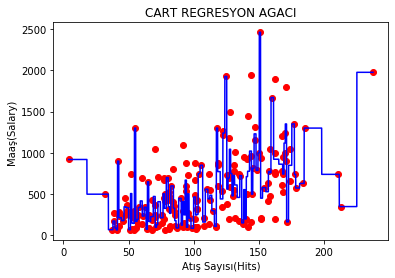

In [102]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train,color="red")

plt.plot(X_grid,cart_model.predict(X_grid),color="blue")
plt.title("CART REGRESYON AGACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)");

In [103]:
#tek değişkenli tahmin

In [104]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [105]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

468.49579052913884

In [106]:
#tüm değişkenler 

In [107]:
df=pd.read_csv("reading_data/Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
y=df["Salary"]
X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [108]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)

In [109]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

438.2465869145388

### CART Model Tuning


In [110]:
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [120]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

429.396873204643

In [121]:
cart_params = {"max_depth": [2,3,4,5,10,20],"min_samples_split":[2,10,5,50,100]}

In [122]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [123]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [124]:
#final model
cart_model_tuned = DecisionTreeRegressor(max_depth=4,min_samples_split=50).fit(X_train,y_train)

In [125]:
y_pred = cart_model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

361.0876906511434

## Random Forests


### Random Forests Model ve Tahmin


In [135]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [136]:
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [137]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

344.73852779396566

### Random Forests Model Tuning


In [138]:
rf_params = {"max_depth":[5,8,10],
             "max_features":[2,5,10],
             "n_estimators":[200,500,1000,2000],
             "min_samples_split":[2,10,80,100]}

In [139]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 18.6min finished


In [140]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [141]:
rf_model_tuned = RandomForestRegressor(random_state=42,max_depth=8,max_features=2,min_samples_split=2,n_estimators=200).fit(X_train,y_train)

In [142]:
y_pred = rf_model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

348.2372919119422

### Değişken önem düzeyi

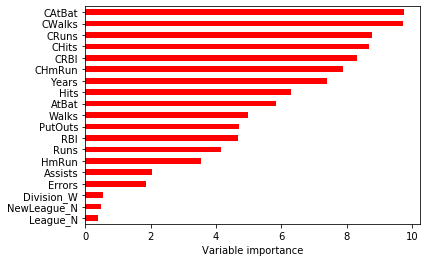

In [144]:
Importance = pd.DataFrame({"Importance":rf_model_tuned.feature_importances_*100},index=X_train.columns)

Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="r");

plt.xlabel("Variable importance")
plt.gca().legend_=None

## Gradient Boosting Machines (GBM)


### Gradient Boosting Machines Model ve Tahmin


In [145]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [146]:
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [147]:
y_pred = gbm_model.predict(X_test)

In [148]:
np.sqrt(mean_squared_error(y_pred,y_test))

344.39637279289747

### Gradient Boosting Machines Model Tuning


In [149]:
gbm_params = {"learning_rate":[0.001,0.1,0.01],
              "max_depth":[3,5,8,],
              "n_estimators":[100,200,500],
              "subsample":[1,0.5,0.8],
             "loss":["ls","lad","quantile"]}

In [150]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [151]:
gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 11.6min finished


In [152]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.5}

In [153]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1,loss="lad",max_depth=3,n_estimators=200,subsample=1).fit(X_train,y_train)

In [154]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

334.2126372921722

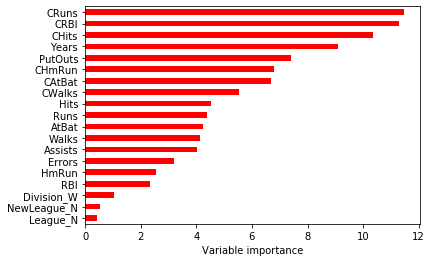

In [155]:
#değişken önem düzeyleri 

Importance = pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100},index=X_train.columns)

Importance.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="r");

plt.xlabel("Variable importance")
plt.gca().legend_=None

## XGBoost

### XGBoost Model ve Tahmin


In [163]:
!pip install xgboost

In [158]:
import xgboost 

In [159]:
from xgboost import XGBRegressor

In [160]:
xgb = XGBRegressor().fit(X_train,y_train)

In [161]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [162]:
y_pred = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

355.4651481224188

### XGBoost Model Tuning


In [164]:
xgb_params = {"learning_rate":[0.1,0.01,0.5],
             "max_depth":[3,5,8],
             "n_estimators":[100,200,500],
             "colsample_bytree":[0.4,0.7,1]}

In [165]:
xgb_cv_model = GridSearchCV(xgb,xgb_params,cv=10,verbose=2,n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   50.2s finished


In [166]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 500}

In [167]:
xgb_tuned = XGBRegressor(colsample_bytree=0.4,learning_rate=0.01,max_depth=8,n_estimators=500).fit(X_train,y_train)

In [168]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

347.57894128085445

## Light GBM


### Light GBM Model ve Tahmin


In [169]:
!pip install lightgbm

In [171]:
from lightgbm import LGBMRegressor

In [172]:
lgb = LGBMRegressor().fit(X_train,y_train)

In [173]:
lgb

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [174]:
y_pred = lgb.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

363.8712087611089

### Light GBM Model Tuning


In [175]:
lgb_params = {"learning_rate":[0.01,0.1,0.5],
             "n_esstimators":[100,200,500],
             "max_depth":[1,3,5,7,9]}

In [179]:
lgb_cv_model= GridSearchCV(lgb,lgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s


[LightGBM] [Warning] Unknown parameter: n_esstimators


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    8.4s finished


In [180]:
lgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_esstimators': 100}

In [181]:
lgb_tuned = LGBMRegressor(learning_rate=0.1,max_depth=3,n_esstimators=100).fit(X_train,y_train)

In [182]:
y_pred = lgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

355.47575940082544

## CatBoost 

### CatBoost Model ve Tahmin


In [183]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=0727f4eddc8bce80add9a0355bdb2ef71c80a9993d2eecf5c05dfa2986bca5b6
  Stored in directory: c:\users\feyza\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [184]:
from catboost import CatBoostRegressor

In [185]:
catb_model = CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 143ms	remaining: 2m 22s
1:	learn: 432.4168868	total: 145ms	remaining: 1m 12s
2:	learn: 426.3836690	total: 147ms	remaining: 49s
3:	learn: 420.2261014	total: 150ms	remaining: 37.2s
4:	learn: 414.9976675	total: 152ms	remaining: 30.2s
5:	learn: 409.6125323	total: 155ms	remaining: 25.6s
6:	learn: 403.9277911	total: 157ms	remaining: 22.2s
7:	learn: 398.4395285	total: 159ms	remaining: 19.7s
8:	learn: 392.4517081	total: 161ms	remaining: 17.7s
9:	learn: 387.4871123	total: 163ms	remaining: 16.2s
10:	learn: 382.6230510	total: 166ms	remaining: 14.9s
11:	learn: 378.1012454	total: 169ms	remaining: 13.9s
12:	learn: 372.6002306	total: 172ms	remaining: 13.1s
13:	learn: 368.4682192	total: 175ms	remaining: 12.3s
14:	learn: 364.0565766	total: 178ms	remaining: 11.7s
15:	learn: 359.5683249	total: 180ms	remaining: 11.1s
16:	learn: 355.1782794	total: 183ms	remaining: 10.6s
17:	learn: 350.4689946	total: 186ms	remaining: 10.1s
18:	learn: 346.2553348	tot

In [186]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

350.2683163098795

### CatBoost Model Tuning


In [187]:
catb_params ={"iterations":[200,500],
             "learning_rate":[0.01,0.1],
             "depth":[3,5]}

In [188]:
catb_cv_model = GridSearchCV(catb_model,catb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   37.1s finished


0:	learn: 422.4143448	total: 2.24ms	remaining: 1.12s
1:	learn: 404.1864276	total: 5.35ms	remaining: 1.33s
2:	learn: 386.3231718	total: 7.31ms	remaining: 1.21s
3:	learn: 370.5548032	total: 9.24ms	remaining: 1.15s
4:	learn: 354.9242038	total: 11.6ms	remaining: 1.15s
5:	learn: 342.3403984	total: 13.8ms	remaining: 1.14s
6:	learn: 328.2370070	total: 16.1ms	remaining: 1.13s
7:	learn: 317.5056526	total: 18.4ms	remaining: 1.13s
8:	learn: 306.6243511	total: 20.6ms	remaining: 1.12s
9:	learn: 297.3147023	total: 22.6ms	remaining: 1.11s
10:	learn: 288.3685892	total: 24.7ms	remaining: 1.1s
11:	learn: 281.0996220	total: 26.9ms	remaining: 1.09s
12:	learn: 273.2254898	total: 28.5ms	remaining: 1.07s
13:	learn: 266.9003385	total: 29.9ms	remaining: 1.04s
14:	learn: 261.9092500	total: 31.4ms	remaining: 1.02s
15:	learn: 256.2637350	total: 33ms	remaining: 999ms
16:	learn: 250.3667935	total: 34.6ms	remaining: 984ms
17:	learn: 244.8631098	total: 36.8ms	remaining: 986ms
18:	learn: 240.1540669	total: 38.8ms	rema

In [189]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 500, 'learning_rate': 0.1}

In [192]:
catb_tuned = CatBoostRegressor(depth=3,iterations=500,learning_rate=0.1).fit(X_train,y_train)

0:	learn: 425.7900818	total: 1.12ms	remaining: 559ms
1:	learn: 404.8723520	total: 2.16ms	remaining: 538ms
2:	learn: 387.4057666	total: 2.84ms	remaining: 470ms
3:	learn: 372.2801584	total: 3.82ms	remaining: 474ms
4:	learn: 358.9204229	total: 4.58ms	remaining: 453ms
5:	learn: 347.0083933	total: 5.5ms	remaining: 453ms
6:	learn: 336.0130818	total: 6.37ms	remaining: 449ms
7:	learn: 324.3923300	total: 7.29ms	remaining: 449ms
8:	learn: 314.8690957	total: 8.03ms	remaining: 438ms
9:	learn: 308.5075563	total: 8.75ms	remaining: 429ms
10:	learn: 298.8587285	total: 9.63ms	remaining: 428ms
11:	learn: 294.7655438	total: 10.6ms	remaining: 429ms
12:	learn: 288.0697862	total: 11.4ms	remaining: 429ms
13:	learn: 282.6697154	total: 12.3ms	remaining: 427ms
14:	learn: 277.6121667	total: 13ms	remaining: 421ms
15:	learn: 273.4383979	total: 13.9ms	remaining: 421ms
16:	learn: 269.1556201	total: 14.8ms	remaining: 421ms
17:	learn: 264.8098704	total: 15.7ms	remaining: 421ms
18:	learn: 261.6700768	total: 16.6ms	rema

In [193]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

336.40041748521486

## Makine Öğrenmesi Görevlerinin Otomatikleştirilmesi


In [195]:
df=pd.read_csv("reading_data/Hitters.csv")
df=df.dropna()
dms=pd.get_dummies(df[["League","Division","NewLeague"]])

In [204]:
def compML(df,y,alg):
    #train-test split
    y=df[y]
    X_=df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
    X=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_pred,y_test))
    model_ismi =alg.__name__
    print(model_ismi,":",RMSE)

In [205]:
compML(df,"Salary",LGBMRegressor)

LGBMRegressor : 363.8712087611089


In [200]:
compML(df,"Salary",SVR)

460.0032657244849

In [201]:
models = [LGBMRegressor,
         XGBRegressor,
         GradientBoostingRegressor,
         RandomForestRegressor,
         DecisionTreeRegressor,
         MLPRegressor,
         KNeighborsRegressor,
         SVR]

In [207]:
for i in models:
    compML(df,"Salary",i)

LGBMRegressor : 363.8712087611089
XGBRegressor : 355.4651481224188
GradientBoostingRegressor : 347.09288361507424
RandomForestRegressor : 339.8332183580334
DecisionTreeRegressor : 519.6253139099073
MLPRegressor : 345.5028498185792
KNeighborsRegressor : 426.6570764525201
SVR : 460.0032657244849
